# 数据导入与清洗

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutup

shutup.please()

data = pd.read_csv("EURGBP.csv", sep='\t')
# data.drop(columns=['<TIME>'], inplace=True)
data

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2003.01.01,0.65180,0.65220,0.64970,0.65070,3951,0,50
1,2003.01.02,0.65060,0.65340,0.64770,0.65030,6500,0,50
2,2003.01.03,0.65030,0.65220,0.64680,0.64790,6445,0,50
3,2003.01.06,0.64760,0.65240,0.64700,0.65040,6558,0,50
4,2003.01.07,0.65030,0.65100,0.64800,0.64890,7046,0,50
...,...,...,...,...,...,...,...,...
5407,2023.10.30,0.87093,0.87404,0.87067,0.87227,54841,0,0
5408,2023.10.31,0.87231,0.87536,0.86961,0.87019,68227,0,0
5409,2023.11.01,0.87017,0.87121,0.86824,0.86938,69430,0,0
5410,2023.11.02,0.86938,0.87354,0.86890,0.87033,60801,0,2


In [2]:
data = data.iloc[:, :-2]
data

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>
0,2003.01.01,0.65180,0.65220,0.64970,0.65070,3951
1,2003.01.02,0.65060,0.65340,0.64770,0.65030,6500
2,2003.01.03,0.65030,0.65220,0.64680,0.64790,6445
3,2003.01.06,0.64760,0.65240,0.64700,0.65040,6558
4,2003.01.07,0.65030,0.65100,0.64800,0.64890,7046
...,...,...,...,...,...,...
5407,2023.10.30,0.87093,0.87404,0.87067,0.87227,54841
5408,2023.10.31,0.87231,0.87536,0.86961,0.87019,68227
5409,2023.11.01,0.87017,0.87121,0.86824,0.86938,69430
5410,2023.11.02,0.86938,0.87354,0.86890,0.87033,60801


## 构建乖离度指标

In [3]:
data['bias'] = data['<CLOSE>'] / data['<CLOSE>'].rolling(5).mean() - 1
data

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,bias
0,2003.01.01,0.65180,0.65220,0.64970,0.65070,3951,NaN
1,2003.01.02,0.65060,0.65340,0.64770,0.65030,6500,NaN
2,2003.01.03,0.65030,0.65220,0.64680,0.64790,6445,NaN
3,2003.01.06,0.64760,0.65240,0.64700,0.65040,6558,NaN
4,2003.01.07,0.65030,0.65100,0.64800,0.64890,7046,-0.001139
...,...,...,...,...,...,...,...
5407,2023.10.30,0.87093,0.87404,0.87067,0.87227,54841,0.000973
5408,2023.10.31,0.87231,0.87536,0.86961,0.87019,68227,-0.001304
5409,2023.11.01,0.87017,0.87121,0.86824,0.86938,69430,-0.001566
5410,2023.11.02,0.86938,0.87354,0.86890,0.87033,60801,-0.000391


In [4]:
data['return5'] = data['<CLOSE>'] / np.roll(data['<CLOSE>'], 5) - 1
data

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,bias,return5
0,2003.01.01,0.65180,0.65220,0.64970,0.65070,3951,NaN,-0.254015
1,2003.01.02,0.65060,0.65340,0.64770,0.65030,6500,NaN,-0.252692
2,2003.01.03,0.65030,0.65220,0.64680,0.64790,6445,NaN,-0.254756
3,2003.01.06,0.64760,0.65240,0.64700,0.65040,6558,NaN,-0.252697
4,2003.01.07,0.65030,0.65100,0.64800,0.64890,7046,-0.001139,-0.254969
...,...,...,...,...,...,...,...,...
5407,2023.10.30,0.87093,0.87404,0.87067,0.87227,54841,0.000973,0.001458
5408,2023.10.31,0.87231,0.87536,0.86961,0.87019,68227,-0.001304,-0.000551
5409,2023.11.01,0.87017,0.87121,0.86824,0.86938,69430,-0.001566,-0.003336
5410,2023.11.02,0.86938,0.87354,0.86890,0.87033,60801,-0.000391,-0.000425


### 对乖离度指标进行回归

In [5]:
import statsmodels.api as sm
data_to_reg = data.dropna()
data_to_reg = data_to_reg[(data_to_reg.mean() - 3 * data_to_reg.std() < data_to_reg) & (data_to_reg < data_to_reg.mean() + 3 * data_to_reg.std())]
data_to_reg = data_to_reg.iloc[:, 1:].dropna()
y1 = data_to_reg['return5']
x1 = data_to_reg[['bias']]
x1 = sm.add_constant(x1)
mod = sm.OLS(y1, x1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                return5   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     8388.
Date:                Tue, 07 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:01:18   Log-Likelihood:                 19467.
No. Observations:                5287   AIC:                        -3.893e+04
Df Residuals:                    5285   BIC:                        -3.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.946e-05   8.38e-05      0.710      0.4

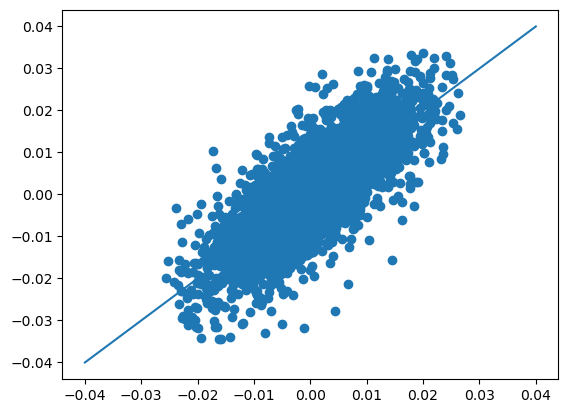

In [6]:
plt.scatter(res.predict(x1), data_to_reg['return5'])
x_set = np.linspace(-0.04, 0.04, 1000)
y_set = x_set
plt.plot(x_set, y_set)
plt.show()

乖离度指标表现很好

## 构建ATR指标

In [7]:
from ta.volatility import AverageTrueRange

ATR = AverageTrueRange(data['<HIGH>'], data['<LOW>'], data['<CLOSE>'], window=5).average_true_range()
data['ATR'] = ATR
data

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,bias,return5,ATR
0,2003.01.01,0.65180,0.65220,0.64970,0.65070,3951,NaN,-0.254015,0.000000
1,2003.01.02,0.65060,0.65340,0.64770,0.65030,6500,NaN,-0.252692,0.000000
2,2003.01.03,0.65030,0.65220,0.64680,0.64790,6445,NaN,-0.254756,0.000000
3,2003.01.06,0.64760,0.65240,0.64700,0.65040,6558,NaN,-0.252697,0.000000
4,2003.01.07,0.65030,0.65100,0.64800,0.64890,7046,-0.001139,-0.254969,0.004400
...,...,...,...,...,...,...,...,...,...
5407,2023.10.30,0.87093,0.87404,0.87067,0.87227,54841,0.000973,0.001458,0.003626
5408,2023.10.31,0.87231,0.87536,0.86961,0.87019,68227,-0.001304,-0.000551,0.004051
5409,2023.11.01,0.87017,0.87121,0.86824,0.86938,69430,-0.001566,-0.003336,0.003835
5410,2023.11.02,0.86938,0.87354,0.86890,0.87033,60801,-0.000391,-0.000425,0.003996


In [8]:
data_to_reg = data.dropna()
data_to_reg = data_to_reg[(data_to_reg.mean() - 3 * data_to_reg.std() < data_to_reg) & (data_to_reg < data_to_reg.mean() + 3 * data_to_reg.std())]
data_to_reg = data_to_reg.iloc[:, 1:].dropna()
y1 = data_to_reg['return5']
x1 = data_to_reg[['ATR']]
x1 = sm.add_constant(x1)
mod = sm.OLS(y1, x1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                return5   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.134
Date:                Tue, 07 Nov 2023   Prob (F-statistic):              0.287
Time:                        13:01:18   Log-Likelihood:                 16813.
No. Observations:                5217   AIC:                        -3.362e+04
Df Residuals:                    5215   BIC:                        -3.361e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -0.751      0.4

ATR指标一坨

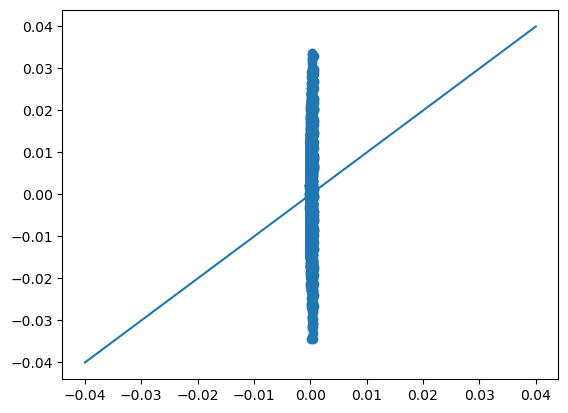

In [9]:
plt.scatter(res.predict(x1), data_to_reg['return5'])
x_set = np.linspace(-0.04, 0.04, 1000)
y_set = x_set
plt.plot(x_set, y_set)
plt.show()

## 构建CCI指标

In [10]:
from ta.trend import CCIIndicator

CCI = CCIIndicator(data['<HIGH>'], data['<LOW>'], data['<CLOSE>'], window=5).cci()
data['cci'] = CCI
data

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,bias,return5,ATR,cci
0,2003.01.01,0.65180,0.65220,0.64970,0.65070,3951,NaN,-0.254015,0.000000,NaN
1,2003.01.02,0.65060,0.65340,0.64770,0.65030,6500,NaN,-0.252692,0.000000,NaN
2,2003.01.03,0.65030,0.65220,0.64680,0.64790,6445,NaN,-0.254756,0.000000,NaN
3,2003.01.06,0.64760,0.65240,0.64700,0.65040,6558,NaN,-0.252697,0.000000,NaN
4,2003.01.07,0.65030,0.65100,0.64800,0.64890,7046,-0.001139,-0.254969,0.004400,-65.373563
...,...,...,...,...,...,...,...,...,...,...
5407,2023.10.30,0.87093,0.87404,0.87067,0.87227,54841,0.000973,0.001458,0.003626,158.678286
5408,2023.10.31,0.87231,0.87536,0.86961,0.87019,68227,-0.001304,-0.000551,0.004051,36.290323
5409,2023.11.01,0.87017,0.87121,0.86824,0.86938,69430,-0.001566,-0.003336,0.003835,-150.698216
5410,2023.11.02,0.86938,0.87354,0.86890,0.87033,60801,-0.000391,-0.000425,0.003996,-19.662921


In [11]:
data_to_reg = data.dropna()
data_to_reg = data_to_reg[(data_to_reg.mean() - 3 * data_to_reg.std() < data_to_reg) & (data_to_reg < data_to_reg.mean() + 3 * data_to_reg.std())]
data_to_reg = data_to_reg.iloc[:, 1:].dropna()
y1 = data_to_reg['return5']
x1 = data_to_reg[['cci']]
x1 = sm.add_constant(x1)
mod = sm.OLS(y1, x1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                return5   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     5628.
Date:                Tue, 07 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:01:18   Log-Likelihood:                 18722.
No. Observations:                5217   AIC:                        -3.744e+04
Df Residuals:                    5215   BIC:                        -3.743e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   9.26e-05      1.749      0.0

In [12]:
data_to_reg = data.dropna()
data_to_reg = data_to_reg[(data_to_reg.mean() - 3 * data_to_reg.std() < data_to_reg) & (data_to_reg < data_to_reg.mean() + 3 * data_to_reg.std())]
data_to_reg = data_to_reg.iloc[:, 1:].dropna()
y1 = data_to_reg['return5']
x1 = data_to_reg[['cci', 'bias']]
x1 = sm.add_constant(x1)
mod = sm.OLS(y1, x1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                return5   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     4533.
Date:                Tue, 07 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:01:18   Log-Likelihood:                 19440.
No. Observations:                5217   AIC:                        -3.887e+04
Df Residuals:                    5214   BIC:                        -3.886e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.277e-05   8.07e-05      0.901      0.3

Bias是比CCI更好的指标

## 构建RSI

In [13]:
from ta.momentum import RSIIndicator

RSI = RSIIndicator(data['<CLOSE>'], window=5).rsi()
data['rsi'] = RSI
data

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,bias,return5,ATR,cci,rsi
0,2003.01.01,0.65180,0.65220,0.64970,0.65070,3951,NaN,-0.254015,0.000000,NaN,NaN
1,2003.01.02,0.65060,0.65340,0.64770,0.65030,6500,NaN,-0.252692,0.000000,NaN,NaN
2,2003.01.03,0.65030,0.65220,0.64680,0.64790,6445,NaN,-0.254756,0.000000,NaN,NaN
3,2003.01.06,0.64760,0.65240,0.64700,0.65040,6558,NaN,-0.252697,0.000000,NaN,NaN
4,2003.01.07,0.65030,0.65100,0.64800,0.64890,7046,-0.001139,-0.254969,0.004400,-65.373563,38.162113
...,...,...,...,...,...,...,...,...,...,...,...
5407,2023.10.30,0.87093,0.87404,0.87067,0.87227,54841,0.000973,0.001458,0.003626,158.678286,71.132344
5408,2023.10.31,0.87231,0.87536,0.86961,0.87019,68227,-0.001304,-0.000551,0.004051,36.290323,48.057489
5409,2023.11.01,0.87017,0.87121,0.86824,0.86938,69430,-0.001566,-0.003336,0.003835,-150.698216,41.503727
5410,2023.11.02,0.86938,0.87354,0.86890,0.87033,60801,-0.000391,-0.000425,0.003996,-19.662921,51.250266


In [14]:
data_to_reg = data.dropna()
data_to_reg = data_to_reg[(data_to_reg.mean() - 3 * data_to_reg.std() < data_to_reg) & (data_to_reg < data_to_reg.mean() + 3 * data_to_reg.std())]
data_to_reg = data_to_reg.iloc[:, 1:].dropna()
y1 = data_to_reg['return5']
x1 = data_to_reg[['rsi']]
x1 = sm.add_constant(x1)
mod = sm.OLS(y1, x1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                return5   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                 1.217e+04
Date:                Tue, 07 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:01:18   Log-Likelihood:                 19953.
No. Observations:                5217   AIC:                        -3.990e+04
Df Residuals:                    5215   BIC:                        -3.989e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0209      0.000   -102.464      0.0

In [15]:
data_to_reg = data.dropna()
data_to_reg = data_to_reg[(data_to_reg.mean() - 3 * data_to_reg.std() < data_to_reg) & (data_to_reg < data_to_reg.mean() + 3 * data_to_reg.std())]
data_to_reg = data_to_reg.iloc[:, 1:].dropna()
y1 = data_to_reg['return5']
x1 = data_to_reg[['rsi', 'bias']]
x1 = sm.add_constant(x1)
mod = sm.OLS(y1, x1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                return5   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     7201.
Date:                Tue, 07 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:01:19   Log-Likelihood:                 20268.
No. Observations:                5217   AIC:                        -4.053e+04
Df Residuals:                    5214   BIC:                        -4.051e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0143      0.000    -44.443      0.0

## 构建ADX

In [16]:
from ta.trend import ADXIndicator

ADX = ADXIndicator(data['<HIGH>'], data['<LOW>'], data['<CLOSE>'], window=5).adx()
data['adx'] = ADX
data

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,bias,return5,ATR,cci,rsi,adx
0,2003.01.01,0.65180,0.65220,0.64970,0.65070,3951,NaN,-0.254015,0.000000,NaN,NaN,0.000000
1,2003.01.02,0.65060,0.65340,0.64770,0.65030,6500,NaN,-0.252692,0.000000,NaN,NaN,0.000000
2,2003.01.03,0.65030,0.65220,0.64680,0.64790,6445,NaN,-0.254756,0.000000,NaN,NaN,0.000000
3,2003.01.06,0.64760,0.65240,0.64700,0.65040,6558,NaN,-0.252697,0.000000,NaN,NaN,0.000000
4,2003.01.07,0.65030,0.65100,0.64800,0.64890,7046,-0.001139,-0.254969,0.004400,-65.373563,38.162113,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5407,2023.10.30,0.87093,0.87404,0.87067,0.87227,54841,0.000973,0.001458,0.003626,158.678286,71.132344,51.534626
5408,2023.10.31,0.87231,0.87536,0.86961,0.87019,68227,-0.001304,-0.000551,0.004051,36.290323,48.057489,56.001142
5409,2023.11.01,0.87017,0.87121,0.86824,0.86938,69430,-0.001566,-0.003336,0.003835,-150.698216,41.503727,51.257127
5410,2023.11.02,0.86938,0.87354,0.86890,0.87033,60801,-0.000391,-0.000425,0.003996,-19.662921,51.250266,52.027286


In [17]:
data_to_reg = data.dropna()
data_to_reg = data_to_reg[(data_to_reg.mean() - 3 * data_to_reg.std() < data_to_reg) & (data_to_reg < data_to_reg.mean() + 3 * data_to_reg.std())]
data_to_reg = data_to_reg.iloc[:, 1:].dropna()
y1 = data_to_reg['return5']
x1 = data_to_reg[['adx']]
x1 = sm.add_constant(x1)
mod = sm.OLS(y1, x1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                return5   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     34.92
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           3.66e-09
Time:                        13:01:19   Log-Likelihood:                 16777.
No. Observations:                5194   AIC:                        -3.355e+04
Df Residuals:                    5192   BIC:                        -3.354e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0023      0.000     -5.438      0.0

adx也是一坨

## 试一试mean reversion

In [18]:
data['mv'] = np.log(data['<OPEN>'] / np.roll(data['<CLOSE>'], 1)).rolling(5).sum()
data

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,bias,return5,ATR,cci,rsi,adx,mv
0,2003.01.01,0.65180,0.65220,0.64970,0.65070,3951,NaN,-0.254015,0.000000,NaN,NaN,0.000000,NaN
1,2003.01.02,0.65060,0.65340,0.64770,0.65030,6500,NaN,-0.252692,0.000000,NaN,NaN,0.000000,NaN
2,2003.01.03,0.65030,0.65220,0.64680,0.64790,6445,NaN,-0.254756,0.000000,NaN,NaN,0.000000,NaN
3,2003.01.06,0.64760,0.65240,0.64700,0.65040,6558,NaN,-0.252697,0.000000,NaN,NaN,0.000000,NaN
4,2003.01.07,0.65030,0.65100,0.64800,0.64890,7046,-0.001139,-0.254969,0.004400,-65.373563,38.162113,0.000000,-0.290640
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,2023.10.30,0.87093,0.87404,0.87067,0.87227,54841,0.000973,0.001458,0.003626,158.678286,71.132344,51.534626,-0.001079
5408,2023.10.31,0.87231,0.87536,0.86961,0.87019,68227,-0.001304,-0.000551,0.004051,36.290323,48.057489,56.001142,-0.000826
5409,2023.11.01,0.87017,0.87121,0.86824,0.86938,69430,-0.001566,-0.003336,0.003835,-150.698216,41.503727,51.257127,-0.000654
5410,2023.11.02,0.86938,0.87354,0.86890,0.87033,60801,-0.000391,-0.000425,0.003996,-19.662921,51.250266,52.027286,-0.000138


In [19]:
data_to_reg = data.dropna()
data_to_reg = data_to_reg[(data_to_reg.mean() - 3 * data_to_reg.std() < data_to_reg) & (data_to_reg < data_to_reg.mean() + 3 * data_to_reg.std())]
data_to_reg = data_to_reg.iloc[:, 1:].dropna()
y1 = data_to_reg['return5']
x1 = data_to_reg[['mv']]
x1 = sm.add_constant(x1)
mod = sm.OLS(y1, x1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                return5   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     47.74
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           5.47e-12
Time:                        13:01:19   Log-Likelihood:                 16749.
No. Observations:                5183   AIC:                        -3.349e+04
Df Residuals:                    5181   BIC:                        -3.348e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.577      0.1

In [20]:
data[['rsi', 'bias', 'mv']].corr()

,rsi,bias,mv
rsi,1.000000,0.787043,0.049676
bias,0.787043,1.000000,0.046566
mv,0.049676,0.046566,1.000000


In [21]:
data_to_reg = data.dropna()
data_to_reg = data_to_reg[(data_to_reg.mean() - 3 * data_to_reg.std() < data_to_reg) & (data_to_reg < data_to_reg.mean() + 3 * data_to_reg.std())]
data_to_reg = data_to_reg.iloc[:, 1:].dropna()
y1 = data_to_reg['return5']
x1 = data_to_reg[['rsi', 'bias']]
x1 = sm.add_constant(x1)
mod = sm.OLS(y1, x1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                return5   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     7124.
Date:                Tue, 07 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:01:19   Log-Likelihood:                 20151.
No. Observations:                5183   AIC:                        -4.030e+04
Df Residuals:                    5180   BIC:                        -4.028e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0142      0.000    -44.112      0.0

## 构建动量因子

In [22]:
data['momentum'] = pd.DataFrame(np.log(np.roll(data['<CLOSE>'], 1) / np.roll(data['<OPEN>'], 1))).rolling(5).sum()
data

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,bias,return5,ATR,cci,rsi,adx,mv,momentum
0,2003.01.01,0.65180,0.65220,0.64970,0.65070,3951,NaN,-0.254015,0.000000,NaN,NaN,0.000000,NaN,NaN
1,2003.01.02,0.65060,0.65340,0.64770,0.65030,6500,NaN,-0.252692,0.000000,NaN,NaN,0.000000,NaN,NaN
2,2003.01.03,0.65030,0.65220,0.64680,0.64790,6445,NaN,-0.254756,0.000000,NaN,NaN,0.000000,NaN,NaN
3,2003.01.06,0.64760,0.65240,0.64700,0.65040,6558,NaN,-0.252697,0.000000,NaN,NaN,0.000000,NaN,NaN
4,2003.01.07,0.65030,0.65100,0.64800,0.64890,7046,-0.001139,-0.254969,0.004400,-65.373563,38.162113,0.000000,-0.290640,-0.000649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5407,2023.10.30,0.87093,0.87404,0.87067,0.87227,54841,0.000973,0.001458,0.003626,158.678286,71.132344,51.534626,-0.001079,0.000310
5408,2023.10.31,0.87231,0.87536,0.86961,0.87019,68227,-0.001304,-0.000551,0.004051,36.290323,48.057489,56.001142,-0.000826,0.002536
5409,2023.11.01,0.87017,0.87121,0.86824,0.86938,69430,-0.001566,-0.003336,0.003835,-150.698216,41.503727,51.257127,-0.000654,0.000275
5410,2023.11.02,0.86938,0.87354,0.86890,0.87033,60801,-0.000391,-0.000425,0.003996,-19.662921,51.250266,52.027286,-0.000138,-0.002688


In [23]:
data_to_reg = data.dropna()
data_to_reg = data_to_reg[(data_to_reg.mean() - 3 * data_to_reg.std() < data_to_reg) & (data_to_reg < data_to_reg.mean() + 3 * data_to_reg.std())]
data_to_reg = data_to_reg.iloc[:, 1:].dropna()
y1 = data_to_reg['return5']
x1 = data_to_reg[['momentum']]
x1 = sm.add_constant(x1)
mod = sm.OLS(y1, x1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                return5   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     6861.
Date:                Tue, 07 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:01:19   Log-Likelihood:                 18906.
No. Observations:                5169   AIC:                        -3.781e+04
Df Residuals:                    5167   BIC:                        -3.779e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002   8.69e-05     -2.257      0.0

In [24]:
data[['rsi', 'bias', 'momentum']].corr()

,rsi,bias,momentum
rsi,1.000000,0.787043,0.639435
bias,0.787043,1.000000,0.462249
momentum,0.639435,0.462249,1.000000


In [25]:
data_to_reg = data.dropna()
data_to_reg = data_to_reg[(data_to_reg.mean() - 3 * data_to_reg.std() < data_to_reg) & (data_to_reg < data_to_reg.mean() + 3 * data_to_reg.std())]
data_to_reg = data_to_reg.iloc[:, 1:].dropna()
y1 = data_to_reg['return5']
x1 = data_to_reg[['momentum', 'rsi', 'bias']]
x1 = sm.add_constant(x1)
mod = sm.OLS(y1, x1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                return5   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     9466.
Date:                Tue, 07 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:01:19   Log-Likelihood:                 21559.
No. Observations:                5169   AIC:                        -4.311e+04
Df Residuals:                    5165   BIC:                        -4.308e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0038      0.000    -12.808      0.0

# 建立随机森林模型

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()

data_for_test = data.dropna(axis=0, how='any')[['momentum', 'rsi', 'bias', 'return5']]
data_for_test = data_for_test[(data_for_test > data_for_test.mean() - 3 * data_for_test.std()) & (data_for_test < data_for_test.mean() + 3 * data_for_test.std())]
data_for_test.dropna(inplace=True)
data_for_test.reset_index(inplace=True)

for i in range(len(data_for_test)):
    if data_for_test.loc[i, 'return5'] > 0:
        data_for_test.loc[i, 'bullish'] = 1
    else:
        data_for_test.loc[i, 'bullish'] = 0
data_for_test = data_for_test[['momentum', 'rsi', 'bias', 'bullish']]

X = data_for_test[['momentum', 'rsi', 'bias']]
y = data_for_test[['bullish']]

X = pd.DataFrame(scaler.fit_transform(X), columns=['momentum', 'rsi', 'bias'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,momentum,rsi,bias
2968,0.192478,0.928780,1.249037
2457,0.498547,0.462215,-0.352176
622,-0.481084,0.882826,0.325915
4416,0.318665,1.163878,0.943224
2610,-0.033765,-0.235022,-0.358526
...,...,...,...
3092,-0.845781,-1.279265,-0.241731
3772,0.006334,-1.028657,-1.472084
5191,-0.007161,-0.758661,-0.201468
5226,0.997666,0.091365,-0.131613


In [27]:
y_train

,bullish
2968,1.0
2457,1.0
622,1.0
4416,1.0
2610,0.0
...,...
3092,0.0
3772,0.0
5191,0.0
5226,1.0


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, recall_score, f1_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_features='sqrt', bootstrap=False)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)

print(f'表现{f1}')

表现0.8569604086845467


# 开始回测

## Version 2 回测程序（重新开始）

## version 1 回测程序（有错误）

In [29]:
# import datetime
# 
# # 交易规则：预测涨全仓买入，否则直接卖出，这规则错了
# data_to_backtest = data.dropna()
# data_to_backtest = data_to_backtest.iloc[1:, :]
# data_to_backtest.reset_index(inplace=True)
# backtest_dict = {'capital': [100000], 'position': [0], 'date': [data_to_backtest['<DATE>'][0]]}
# backtest = pd.DataFrame(backtest_dict)
# 
# 
# def buy(day_data):
#     global backtest
#     capital = backtest.iloc[len(backtest) - 1, :]['capital']
#     position = backtest.iloc[len(backtest) - 1, :]['position']
#     if capital > 0:
#         print(f'{day_data["<DATE>"]} buy at price {day_data["<OPEN>"]}')
#     if capital > 0:
#         position += capital / day_data['<OPEN>']
#         capital = 0
#     backtest.loc[len(backtest), :] = [capital, position, day_data['<DATE>']]
# 
# 
# def sell(day_data):
#     global backtest
#     capital = backtest.iloc[len(backtest) - 1, :]['capital']
#     position = backtest.iloc[len(backtest) - 1, :]['position']
#     if position > 0:
#         print(f'{day_data["<DATE>"]} sell at price {day_data["<OPEN>"]}')
#     if position > 0:
#         capital += position * day_data['<OPEN>']
#         position = 0
#     backtest.loc[len(backtest), :] = [capital, position, day_data['<DATE>']]
# 
# 
# def no_trade():
#     global backtest
#     capital = backtest.iloc[len(backtest) - 1, :]['capital']
#     position = backtest.iloc[len(backtest) - 1, :]['position']
#     last_date = backtest.iloc[len(backtest) - 1, :]['date']
#     backtest.loc[len(backtest), :] = [capital, position, datetime.datetime.strftime(datetime.datetime.strptime(last_date, '%Y.%m.%d') + datetime.timedelta(days=1), '%Y.%m.%d')]
# 
# 
# hold_iter = -100
# for i in range(len(data_to_backtest) - 1):
#     # 只能看到今天的数据，明天开盘根据今天收盘的数据进行买入
#     tomorrow_data = data_to_backtest.iloc[i+1, :]
#     if backtest.iloc[i, 1] > 0 and i <= hold_iter + 5:
#         # 如果还处于五天的持有期，不进行交易，否则根据预测进行交易
#         no_trade()
#     else:
#         # 如果今天预测股价会涨，那么全仓买入并持有五天，第五天的时候如果还预测涨再持有五天，否则卖出
#         if rf_classifier.predict(pd.DataFrame((data_to_backtest.loc[i, ['momentum', 'rsi', 'bias']] - scaler.mean_) / scaler.scale_).T)[0] == 1:
#             print(f'{data_to_backtest.iloc[i, :]["<DATE>"]} predict bullish')
#             buy(tomorrow_data)
#             hold_iter = i
#         else:
#             print(f'{data_to_backtest.iloc[i, :]["<DATE>"]} predict bearish')
#             sell(tomorrow_data)
# 
# backtest

In [30]:
# data_to_backtest

In [31]:
# result = pd.merge(data_to_backtest, backtest.rename(columns={'date': '<DATE>'}))
# result

In [32]:
# result['asset'] = result['capital'] + result['position'] * result['<CLOSE>']
# result

In [33]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# 
# plt.rcParams['font.family'] = 'Arial Unicode MS'
# plt.rcParams['axes.unicode_minus'] = False
# 
# ax = sns.lineplot(data=result, x='<DATE>', y='asset', color='#d20000')
# sns.set_style('white')
# sns.despine()
# ax.figure.set_size_inches(16, 4)
# ax.set_xlabel('日期')
# ax.set_ylabel('总资产')
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=50))
# plt.xticks(rotation=45)
# ax.hlines(y=100000, xmin=result.loc[0, :]['<DATE>'], xmax=result.loc[len(result) - 1, :]['<DATE>'], colors='#8c8c8c', linestyles='--')
# ax2 = plt.twinx()
# sns.lineplot(data=result, x='<DATE>', y='<CLOSE>', color='blue', ax=ax2)
# plt.show()

In [34]:
# result['predict'] = rf_classifier.predict(pd.DataFrame((result[['momentum', 'rsi', 'bias']] - scaler.mean_) / scaler.scale_))
# result